In [1]:
import matplotlib.pyplot as plt 
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization,Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [2]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

170498071/170498071 [==============================] - 14s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


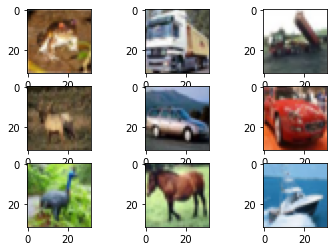

In [3]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i])
# show the figure
plt.show()

In [4]:
#Hence the target is 10 classes we use one hot encodin to transform the integer to a 10 element binary vector
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [5]:
#prepare the pixel values before modelling
#normalize the pixel values and rescale them to the range [0,1]
#convert integers to floats
trainX=trainX.astype('float32')
testX=testX.astype('float32')
#normalize to range [0,1]
trainX=trainX/255.0
testX=testX/255.0

In [6]:
#define a baseline model;we will use the first 3-block of vgg style architecture
#vgg blocks have good starting points
#adding increasing dropout layers:a regularization technique to follow to avoid overfitting
#adding batchnormalization layers to stabilize the learning and accelerate the learning process
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))#randomly drops out some nodes from the network such that the remaining nodes had to pick up their left work
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
#compile the model
model.compile(optimizer=SGD(lr=0.001,momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
#fit the model
history=model.fit(trainX,trainy,epochs=30,batch_size=64,validation_data=(testX,testy),verbose=1)

Epoch 1/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8572 - accuracy: 0.6985 - val_loss: 0.8369 - val_accuracy: 0.7041
Epoch 2/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8408 - accuracy: 0.7047 - val_loss: 0.8139 - val_accuracy: 0.7147
Epoch 3/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8273 - accuracy: 0.7103 - val_loss: 0.7729 - val_accuracy: 0.7269
Epoch 4/30
782/782 [==============================] - 10s 12ms/step - loss: 0.8131 - accuracy: 0.7144 - val_loss: 0.7884 - val_accuracy: 0.7226
Epoch 5/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7964 - accuracy: 0.7194 - val_loss: 0.7189 - val_accuracy: 0.7492
Epoch 6/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7846 - accuracy: 0.7264 - val_loss: 0.7574 - val_accuracy: 0.7346
Epoch 7/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7711 - accuracy: 0.7298 - val_loss: 0.7364 - val_accuracy:

In [10]:
#evaluate the model
_,acc=model.evaluate(testX,testy,verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.5784 - accuracy: 0.8018


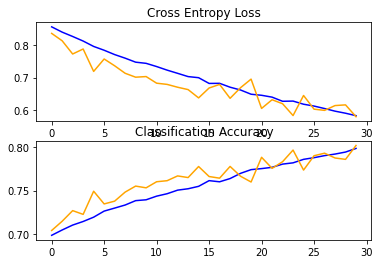

In [11]:
#plot diagnostic learning curves

#plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')

#plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='test')

In [ ]:
#It can be seen that with the increase of training epochs this can work better.Due to time limitation I limited it to 30 epochs.